In [72]:
from astropy.io import fits
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline

data_main_path = '/Users/dengdingshan/Documents/data/obic/'

In [93]:
# Read the fits file.
Lamost_fits = fits.open(data_main_path + 'lamost_obstars.fits')
Lamost_tbl = Lamost_fits[1].data

In [103]:
# Filtering data (should be recorded and discussed!)

# For programming, only teff and logg > 0 is now required.
Lamost_tbl_fil = Lamost_tbl[np.argwhere((Lamost_tbl['teff'] > 0) & (Lamost_tbl['logg'] > -3) & 
                                       (Lamost_tbl['j'] > -1) & (Lamost_tbl['W1'] > -1) &
                                       (Lamost_tbl['err_J'] < 0.03) & (Lamost_tbl['err_W1'] < 0.03 ))]

# the sources should both have the data of JHK and W1W2W3 before we use them.
Lamost_tbl_fil = Lamost_tbl_fil[np.logical_and(\
                                               np.logical_not((Lamost_tbl_fil['j'] == 0) & (Lamost_tbl_fil['h'] == 0)),\
                                               np.logical_not((Lamost_tbl_fil['W1'] == 0) & (Lamost_tbl_fil['W2'] == 0)))]

In [104]:
print(Lamost_tbl_fil['j'])

[ 14.31099987   9.37899971  11.59399986 ...,  12.43099976  12.42500019
  11.08500004]


In [123]:
# Determine the input numbers.

# Bin width, usually 50
bin_width = 500
# Ratio of the bluest edge, usually 5%
ratio = 5
# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 20

In [124]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.
teff_start = min(Lamost_tbl_fil['teff']) - min(Lamost_tbl_fil['teff']) % (bin_width/2)
bin_number = math.ceil((max(Lamost_tbl_fil['teff']) - teff_start) / bin_width)

In [125]:
start_time = time.time()
int_teff = []
int_color = []
for i in range(bin_number):
    bin_tbl = Lamost_tbl_fil[np.logical_and(Lamost_tbl_fil['teff'] > teff_start+i*bin_width, \
                                            Lamost_tbl_fil['teff'] < teff_start+(i+1)*bin_width)]
    if len(bin_tbl) < 100:
        continue
    source_num = 0
    while source_num != len(bin_tbl):
        source_num = len(bin_tbl)
        bin_mean = np.mean(bin_tbl['j']-bin_tbl['W1'])
        bin_sigma = np.std(bin_tbl['j']-bin_tbl['W1'])
        bin_tbl = bin_tbl[np.logical_or(bin_tbl['j']-bin_tbl['W1'] < bin_mean+3*bin_sigma, \
                                  bin_tbl['j']-bin_tbl['W1'] > bin_mean-3*bin_sigma)]
    int_teff.append(float(teff_start+(i+0.5)*bin_width))
    int_color.append(np.median(np.sort(bin_tbl['j']-bin_tbl['W1'])[:math.ceil(len(bin_tbl)*ratio/100)]))
#     int_color.append(np.min(bin_tbl['j'] - bin_tbl['W1']))
    
print(time.time() - start_time)

0.706169843673706


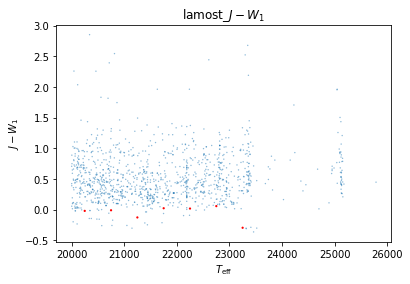

In [127]:
plt.scatter(Lamost_tbl_fil['teff'], Lamost_tbl_fil['j']-Lamost_tbl_fil['W1'], s=2, edgecolors='None', alpha=0.5)
plt.scatter(int_teff, int_color, c='r', edgecolors='None', s=5)
plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel('$J-W_1$')
#plt.ylim(-1,2.5)
plt.title('lamost_$J-W_1$')
plt.savefig('figure/fig.png', dpi=200)
plt.show()